In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()
print('train set shape',train.shape)
print('test set shape',test.shape)
print('Age missing',train.iloc[:891].Age.isnull().sum(),'   ',
      (train.iloc[:891].Age.isnull().sum())/int(891)*int(100),'%')
print('Cabin missing',train.iloc[:891].Cabin.isnull().sum(),'   ',
      (train.iloc[:891].Cabin.isnull().sum())/int(891)*int(100),'%')
print('Embarked missing',train.iloc[:891].Embarked.isnull().sum(),'   ',
      (train.iloc[:891].Embarked.isnull().sum())/int(891)*int(100),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train set shape (891, 12)
test set shape (418, 11)
Age missing 177     19.865319865319865 %
Cabin missing 687     77.10437710437711 %
Embarked missing 2     0.22446689113355783 %


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


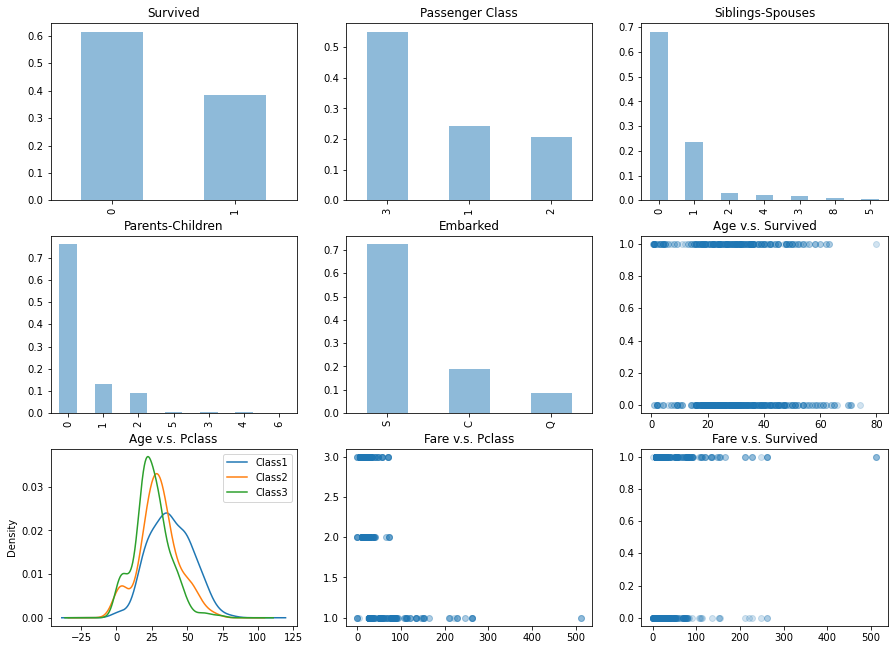

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

plt.subplot2grid((4,3),(0,0))
train.Survived.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Survived')

plt.subplot2grid((4,3),(0,1))
train.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Passenger Class')

plt.subplot2grid((4,3),(0,2))
train.SibSp.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Siblings-Spouses')

plt.subplot2grid((4,3),(1,0))
train.Parch.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Parents-Children')


plt.subplot2grid((4,3),(1,1))
train.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Embarked')

plt.subplot2grid((4,3),(1,2))
plt.scatter(train.Age, train.Survived, alpha=.2)
plt.title('Age v.s. Survived')


plt.subplot2grid((4,3),(2,0))
for x in [1,2,3]:
    train.Age[train.Pclass == x].plot(kind='kde')
plt.title('Age v.s. Pclass')
plt.legend(('Class1', 'Class2','Class3'))

plt.subplot2grid((4,3),(2,1))
plt.scatter(train.Fare, train.Pclass, alpha=.2)
plt.title('Fare v.s. Pclass')

plt.subplot2grid((4,3),(2,2))
plt.scatter(train.Fare, train.Survived, alpha=.2)
plt.title('Fare v.s. Survived')

plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


Text(0.5, 1.0, 'Sex v.s. Survived')

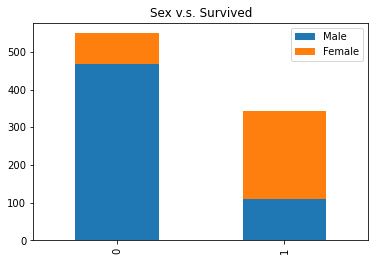

In [7]:
print(pd.pivot_table(train,values='PassengerId',index='Survived',
                  columns='Sex',aggfunc='count'))

Male_sur=train.Survived[train.Sex=='male'].value_counts()
Female_sur=train.Survived[train.Sex=='female'].value_counts()
sig_sex=pd.DataFrame({'Male':Male_sur,'Female':Female_sur})
sig_sex.plot(kind='bar',stacked=True)
plt.title('Sex v.s. Survived')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Text(0.5, 1.0, 'Class v.s. Survived')

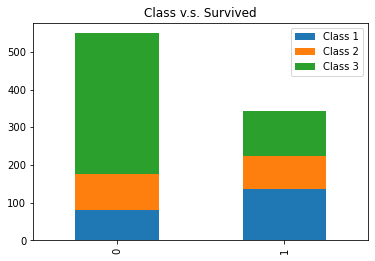

In [8]:
print(pd.pivot_table(train,values='PassengerId',index='Survived',
                  columns='Pclass',aggfunc='count'))

C1_sur=train.Survived[train.Pclass==1].value_counts()
C2_sur=train.Survived[train.Pclass==2].value_counts()
C3_sur=train.Survived[train.Pclass==3].value_counts()
sig_class=pd.DataFrame({'Class 1':C1_sur,'Class 2':C2_sur,'Class 3':C3_sur})
sig_class.plot(kind='bar',stacked=True)
plt.title('Class v.s. Survived')

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47


Text(0.5, 1.0, 'Unsurvived Male v.s. Unsurvived Female')

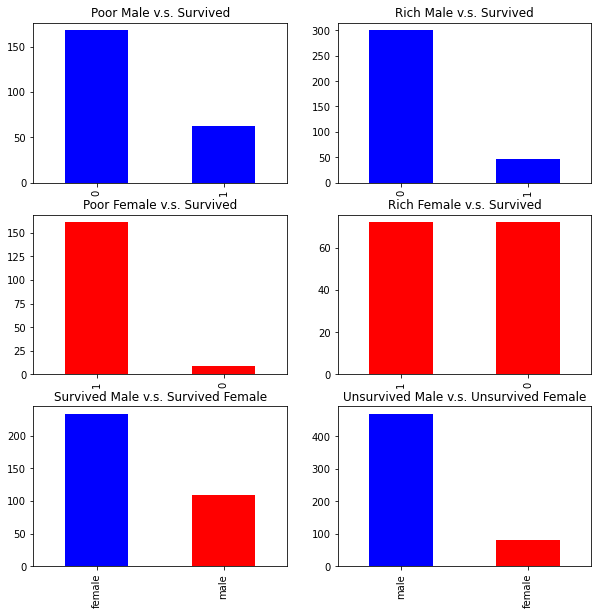

In [9]:
print(pd.pivot_table(train,values='PassengerId',index=['Sex','Survived'],
                  columns='Pclass',aggfunc='count'))


C12_m_sur=train.Survived[train.Pclass!=3][train.Sex=='male'].value_counts()
C3_m_sur=train.Survived[train.Pclass==3][train.Sex=='male'].value_counts()
C12_f_sur=train.Survived[train.Pclass!=3][train.Sex=='female'].value_counts()
C3_f_sur=train.Survived[train.Pclass==3][train.Sex=='female'].value_counts()

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((3,2),(0,0))
train.Survived[train.Pclass!=3][train.Sex=='male'].value_counts().plot(kind='bar',color='blue')
plt.title('Poor Male v.s. Survived')

plt.subplot2grid((3,2),(0,1))
train.Survived[train.Pclass==3][train.Sex=='male'].value_counts().plot(kind='bar',color='blue')
plt.title('Rich Male v.s. Survived')

plt.subplot2grid((3,2),(1,0))
train.Survived[train.Pclass!=3][train.Sex=='female'].value_counts().plot(kind='bar',color='red')
plt.title('Poor Female v.s. Survived')

plt.subplot2grid((3,2),(1,1))
train.Survived[train.Pclass==3][train.Sex=='female'].value_counts().plot(kind='bar',color='red')
plt.title('Rich Female v.s. Survived')

plt.subplot2grid((3,2),(2,0))
train.Sex[train.Survived==1].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Survived Male v.s. Survived Female')

plt.subplot2grid((3,2),(2,1))
train.Sex[train.Survived==0].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Unsurvived Male v.s. Unsurvived Female')


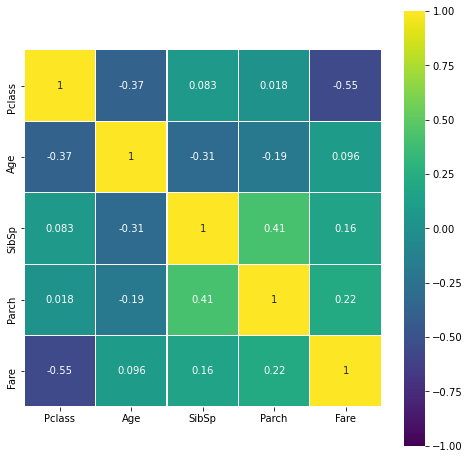

In [10]:
import seaborn as sns

dfc = train.copy()
dfc = dfc.drop(['PassengerId','Survived'], axis=1)
corr = dfc.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr,cmap='viridis',vmax=1.0,vmin=-1.0,linewidths=0.1,annot=True, annot_kws={"size": 10}, square=True)

In [11]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

y_train = train.Survived
X_train = train.drop(['PassengerId','Survived'], axis=1)

X_test = test.drop(['PassengerId'], axis=1)

alldata = X_train.append(X_test)
alldata.shape

(1309, 10)

In [12]:
X_train.info()
print('train set shape',X_train.shape)
n_alldata = int(891)
print('Age missing',train.iloc[:n_alldata].Age.isnull().sum(),'   ',
      (train.iloc[:n_alldata].Age.isnull().sum())/n_alldata*int(100),'%')
print('Cabin missing',train.iloc[:n_alldata].Cabin.isnull().sum(),'   ',
      (train.iloc[:n_alldata].Cabin.isnull().sum())/n_alldata*int(100),'%')
print('Embarked missing',train.iloc[:n_alldata].Embarked.isnull().sum(),'   ',
      (train.iloc[:n_alldata].Embarked.isnull().sum())/n_alldata*int(100),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB
train set shape (891, 10)
Age missing 177     19.865319865319865 %
Cabin missing 687     77.10437710437711 %
Embarked missing 2     0.22446689113355783 %


In [13]:
X_test.info()
print('test set shape',X_test.shape)
n_alldata = int(418)
print('Age missing',train.iloc[:n_alldata].Age.isnull().sum(),'   ',
      (train.iloc[:n_alldata].Age.isnull().sum())/n_alldata*int(100),'%')
print('Cabin missing',train.iloc[:n_alldata].Cabin.isnull().sum(),'   ',
      (train.iloc[:n_alldata].Cabin.isnull().sum())/n_alldata*int(100),'%')
print('Fare missing',train.iloc[:n_alldata].Fare.isnull().sum(),'   ',
      (train.iloc[:n_alldata].Fare.isnull().sum())/n_alldata*int(100),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB
test set shape (418, 10)
Age missing 83     19.85645933014354 %
Cabin missing 326     77.99043062200957 %
Fare missing 0     0.0 %


In [14]:
alldata.info()
print('alldata shape',alldata.shape)
n_alldata = int(1309)
print('Age missing',train.iloc[:n_alldata].Age.isnull().sum(),'   ',
      (train.iloc[:n_alldata].Age.isnull().sum())/n_alldata*int(100),'%')
print('Cabin missing',train.iloc[:n_alldata].Cabin.isnull().sum(),'   ',
      (train.iloc[:n_alldata].Cabin.isnull().sum())/n_alldata*int(100),'%')
print('Embarked missing',train.iloc[:n_alldata].Embarked.isnull().sum(),'   ',
      (train.iloc[:n_alldata].Embarked.isnull().sum())/n_alldata*int(100),'%')
print('Fare missing',train.iloc[:n_alldata].Fare.isnull().sum(),'   ',
      (train.iloc[:n_alldata].Fare.isnull().sum())/n_alldata*int(100),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB
alldata shape (1309, 10)
Age missing 177     13.521772345301757 %
Cabin missing 687     52.482811306340714 %
Embarked missing 2     0.15278838808250572 %
Fare missing 0     0.0 %


In [15]:
alldata['Embarked_revised'] = alldata['Embarked']
alldata.Embarked_revised.fillna('S', inplace=True) # replace with the most frequent one. Use train.Embarked.value_counts()
alldata['Cabin_revised'] = alldata['Cabin'] 
alldata.Cabin_revised[alldata.Cabin_revised.notnull()]=1
alldata.Cabin_revised[alldata.Cabin_revised.isnull()]=0
alldata['Age_revised'] = alldata.Age.fillna(alldata.Age.median())
alldata['Fare_revised'] = alldata.Fare.fillna(alldata.Fare.median())
print('Null Embarked: ',alldata.Embarked_revised.isnull().sum())
print('Null Fare: ',alldata.Fare_revised.isnull().sum())
print('Null Age: ',alldata.Age_revised.isnull().sum())
print('Null Cabin: ',alldata.Cabin_revised.isnull().sum())


dummy_features = pd.get_dummies(alldata[['Sex','Embarked_revised','Cabin_revised']])
dummy_Pclass = pd.get_dummies(alldata['Pclass'], prefix= 'Pclass')
alldata_set = pd.concat([dummy_Pclass,alldata['Age_revised'],alldata['SibSp'],
                         alldata['Parch'],alldata['Fare_revised'],dummy_features],axis=1)
print(alldata_set.shape)


names = set() # adds a given element to a set if the element is not present in the set
for name in alldata['Name']:
    names.add(name.split(',')[1].split('.')[0].strip())
print(names)
tmp = pd.DataFrame()
tmp['Pre_Name'] = alldata['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
dummy_Name = pd.get_dummies(tmp['Pre_Name'], prefix= 'Name')
alldata_set = pd.concat([alldata_set,dummy_Name],axis=1)
print(alldata_set.shape)
alldata_set.head()

Null Embarked:  0
Null Fare:  0
Null Age:  0
Null Cabin:  0
(1309, 14)
{'Major', 'Dona', 'Mr', 'Sir', 'Master', 'Jonkheer', 'Mlle', 'Mrs', 'Miss', 'the Countess', 'Ms', 'Dr', 'Col', 'Lady', 'Capt', 'Rev', 'Mme', 'Don'}
(1309, 32)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Pclass_1,Pclass_2,Pclass_3,Age_revised,SibSp,Parch,Fare_revised,Sex_female,Sex_male,Embarked_revised_C,...,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess
0,0,0,1,22.0,1,0,7.2500,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,38.0,1,0,71.2833,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,26.0,0,0,7.9250,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,35.0,1,0,53.1000,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,35.0,0,0,8.0500,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
alldata_set[['Age_revised','Fare_revised']]= scale.fit_transform(alldata_set[['Age_revised','Fare_revised']])
print(alldata_set.shape)
alldata_set.head()

(1309, 32)


,Pclass_1,Pclass_2,Pclass_3,Age_revised,SibSp,Parch,Fare_revised,Sex_female,Sex_male,Embarked_revised_C,...,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess
0,0,0,1,-0.581628,1,0,-0.503291,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0.658652,1,0,0.734744,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,-0.271558,0,0,-0.490240,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0.426099,1,0,0.383183,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.426099,0,0,-0.487824,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import tree

array = alldata_set.values
X = array[:891,:]
y = y_train.values
X_test = array[891:,:]

rf = RandomForestClassifier(max_depth=5,random_state = 1)
rf = rf.fit(X,y)
cv = cross_val_score(rf,X,y,cv=20)
print(cv)
print(cv.mean())

[0.77777778 0.91111111 0.8        0.86666667 0.77777778 0.75555556
 0.8        0.91111111 0.88888889 0.84444444 0.8        0.75
 0.79545455 0.86363636 0.84090909 0.77272727 0.81818182 0.90909091
 0.84090909 0.86363636]
0.8293939393939395


   Pclass_1  Pclass_2  Pclass_3  Age_revised  SibSp  Parch  Fare_revised  \
0         0         0         1    -0.581628      1      0     -0.503291   
1         1         0         0     0.658652      1      0      0.734744   
2         0         0         1    -0.271558      0      0     -0.490240   
3         1         0         0     0.426099      1      0      0.383183   
4         0         0         1     0.426099      0      0     -0.487824   

   Sex_female  Sex_male  Embarked_revised_C  ...  Name_Master  Name_Miss  \
0           0         1                   0  ...            0          0   
1           1         0                   1  ...            0          0   
2           1         0                   0  ...            0          1   
3           1         0                   0  ...            0          0   
4           0         1                   0  ...            0          0   

   Name_Mlle  Name_Mme  Name_Mr  Name_Mrs  Name_Ms  Name_Rev  Name_Sir  \
0          0

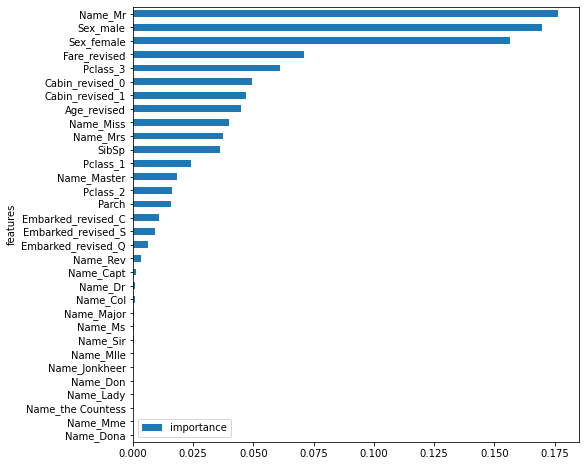

In [18]:
feature_set = pd.DataFrame()
feature_set = alldata_set
print(feature_set.head())

features = pd.DataFrame()
features['features'] = feature_set.columns
features['importance'] = rf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('features', inplace=True)

features.plot(kind='barh', figsize=(8, 8))

In [19]:
from sklearn.feature_selection import SelectFromModel
print(X.shape)
SFM = SelectFromModel(rf, prefit=True)
X_reduced = SFM.transform(X)
print(X_reduced.shape)
print(X_test.shape)
X_test_reduced = SFM.transform(X_test)
print(X_test_reduced.shape)

(891, 32)
(891, 11)
(418, 32)
(418, 11)


In [20]:
rf = RandomForestClassifier(max_depth=5,random_state = 1)
rf = rf.fit(X_reduced,y)
cv = cross_val_score(rf,X_reduced,y,cv=20)
print(cv)
print(cv.mean())

[0.77777778 0.88888889 0.77777778 0.88888889 0.77777778 0.75555556
 0.8        0.93333333 0.88888889 0.82222222 0.82222222 0.77272727
 0.75       0.86363636 0.84090909 0.77272727 0.79545455 0.90909091
 0.84090909 0.86363636]
0.8271212121212121


In [21]:
prediction_y = rf.predict(X_test_reduced).astype(np.int32)
submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': prediction_y})
submission.to_csv('submission_v4.csv', index=False)